### Notebook to visualise results of the late onset sets 

In [1]:
using CairoMakie
using XLSX
using RData
using DataFrames

In [ ]:
file_path_accuracy = "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Thesis writing/Combined results.xlsx"
sheet = "Late onset"

df_accuracies = DataFrame(XLSX.readtable(file_path_accuracy, sheet))
total_individuals = 200
df_accuracies = (df_accuracies ./total_individuals) .*100;



Row,LCTA,NN,Lkmeans
,Float64,Float64,Float64
1,100.0,50.0,100.0
2,50.0,49.0,50.0
3,34.0,35.0,26.0
4,25.0,30.5,25.0


In [3]:
file_paths = [
    "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Late onset sets/four_group_data_late_onset_noise_0.2_t=1.Rdata",
    "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Late onset sets/four_group_data_late_onset_noise_0.2_t=2.Rdata",
    "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Late onset sets/four_group_data_late_onset_noise_0.2_t=3.Rdata",
    "C:/Users/20192809/OneDrive - TU Eindhoven/TUe/Thesis/Synthetic data tests/Late onset sets/four_group_data_late_onset_noise_0.2_t=4.Rdata"
]

df_t1 = load(file_paths[1])["data"]
df_t2 = load(file_paths[2])["data"]
df_t3 = load(file_paths[3])["data"]
df_t4 = load(file_paths[4])["data"];

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


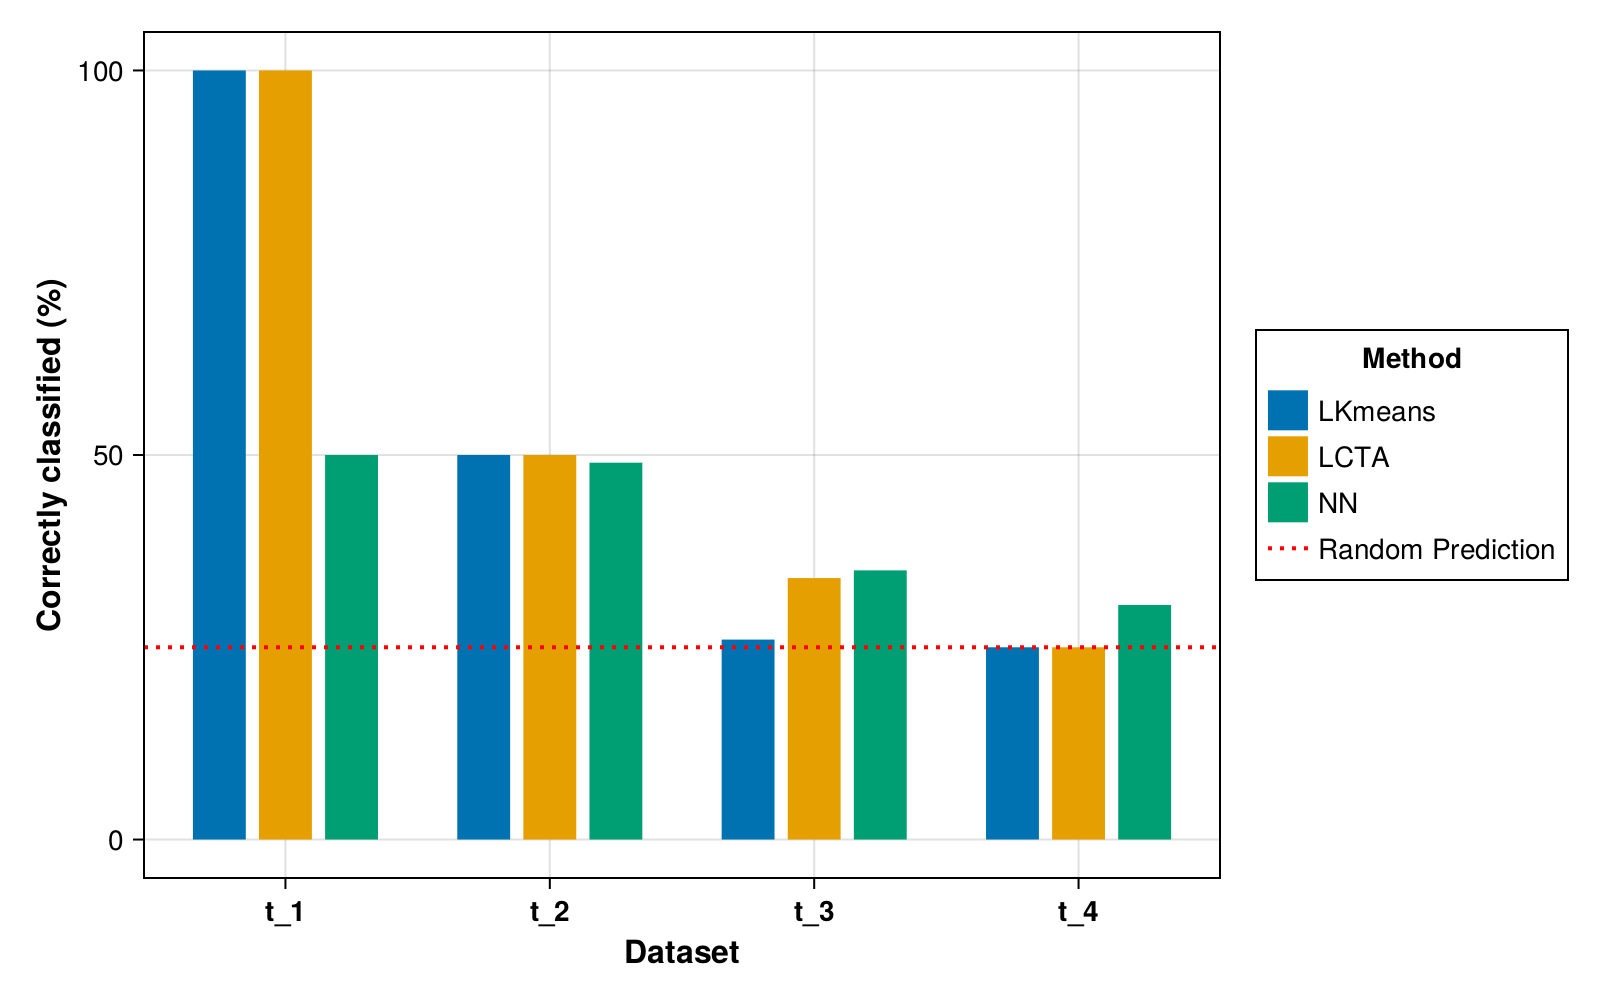

In [11]:
rownames = ["t_1", "t_2", "t_3", "t_4"]

# Extract values
lcta_values = Float64.(vec(df_accuracies[:, 1]))
nn_values = Float64.(vec(df_accuracies[:, 2]))
lkmeans_values = Float64.(vec(df_accuracies[:, 3]))

# Define bar positions
x = 1:length(rownames)
bar_width = 0.25  # Controls spacing between bars

# Define colours
colormap = Makie.wong_colors()[1:3]
labels = ["LKmeans", "LCTA", "NN"]

# Create figure
fig = Figure(resolution=(800, 500))
ax = Axis(fig[1, 1], 
    xticks=(x, rownames), ylabel="Correctly classified (%)",
    xlabel="Dataset", ylabelfont=:bold, xlabelfont=:bold, ylabelsize=16, xlabelsize=16,
    xticklabelsize=14, xticklabelfont=:bold)

# Plot bars with small offsets


barplot!(x .- bar_width, lkmeans_values, color=colormap[1], width=bar_width)
barplot!(x , lcta_values, color=colormap[2], width=bar_width)
barplot!(x .+ bar_width, nn_values, color=colormap[3], width=bar_width)

# Add red dotted line at y = 25% with label
hlines!(25, color=:red, linestyle=:dot, linewidth=2)

# Add legend
Legend(fig[1, 2], 
       [PolyElement(color=c) for c in colormap] ∪ [LineElement(color=:red, linestyle=:dot, linewidth=2)], 
       labels ∪ ["Random Prediction"], "Method")

# Show plot
fig

# Save the plot
# save("Test_accuracies_late_onset.png", fig, px_per_unit=2)


In [5]:
# Define group mappings
group_names = Dict("1" => "Healthy", "2" => "T2DM", "3" => "Insulin resistant", "4" => "β-cell dysfunction")
group_labels = unique(df_t2[:, :group])  # Extract unique group labels (as strings)

# Define colours for each group
colormap = Makie.wong_colors()[1:length(group_labels)]
group_colors = Dict(group_labels .=> colormap)

# Create figure with two subplots and a shared x-axis
fig = Figure(resolution = (900, 400))
ax1 = Axis(fig[1, 1], xlabel="τ", ylabel="k5", 
           xlabelsize=20, ylabelsize=16, 
           xticklabelsize=14, yticklabelsize=14, 
           xlabelfont=:bold, ylabelfont=:bold)

ax2 = Axis(fig[1, 2], xlabel="τ", ylabel="k6", 
           xlabelsize=20, ylabelsize=16, 
           xticklabelsize=14, yticklabelsize=14, 
           xlabelfont=:bold, ylabelfont=:bold)


# Ensure x-axis spans the same range for both plots
τ_min, τ_max = extrema(df_t2[:, :time])
xlims!(ax1, τ_min, τ_max)
xlims!(ax2, τ_min, τ_max)

# Plot lines for each group
for group in group_labels
    group_data = df_t3[df_t3[:, :group] .== group, :]
    for id in unique(group_data[:, :ID])  # Iterate over individuals
        person_data = group_data[group_data[:, :ID] .== id, :]
        lines!(ax1, person_data[:, :time], person_data[:, :k5], color=group_colors[group])
        lines!(ax2, person_data[:, :time], person_data[:, :k6], color=group_colors[group])
    end
end

# Add legend to position [1,3]
Legend(fig[1, 3], [PolyElement(color=group_colors[g]) for g in group_labels], 
       [group_names[g] for g in group_labels], "Group")

# Display figure
fig

# save figure 
save("./late_onset_t=3_trajectory.png", fig)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie C:\Users\20192809\.julia\packages\Makie\VRavR\src\scenes.jl:220


CairoMakie.Screen{IMAGE}
